In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys,os
%run datuslib.ipynb

#ROBADO DE LAS NOTE DE CLASES
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn



In [46]:
#CARGO DATASET

C_tweets = pd.read_csv("train.csv")

In [47]:
#Quito twets duplicados
C_tweets.drop_duplicates(subset='text',inplace = True)

In [48]:
C_tweets

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7604,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1
7605,10864,NaN,NaN,on the flip side I'm at Walmart and there is a...,1
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1


In [49]:
C_keyword = C_tweets['keyword'].unique()

In [50]:
C_keyword

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [51]:
#Cuantas leyword distintas existen en el df
len(C_keyword)

222

In [52]:
#Agrupo por keyword  y cuenta las ocurrencias de cada uno
C_grouped = C_tweets.groupby(['keyword']).agg({'id':'count'}).rename(columns={"id": "cantidad"})

In [53]:
C_grouped.reset_index(inplace=True)

In [54]:
C_grouped

,keyword,cantidad
0,ablaze,35
1,accident,35
2,aftershock,32
3,airplane%20accident,34
4,ambulance,38
...,...,...
216,wounded,37
217,wounds,33
218,wreck,37
219,wreckage,37


In [55]:
#Area del plot mas alto que ancho
plt.rcParams['figure.figsize'] = (15, 30)

Text(0.5, 1.0, 'Plot a poner Titulo')

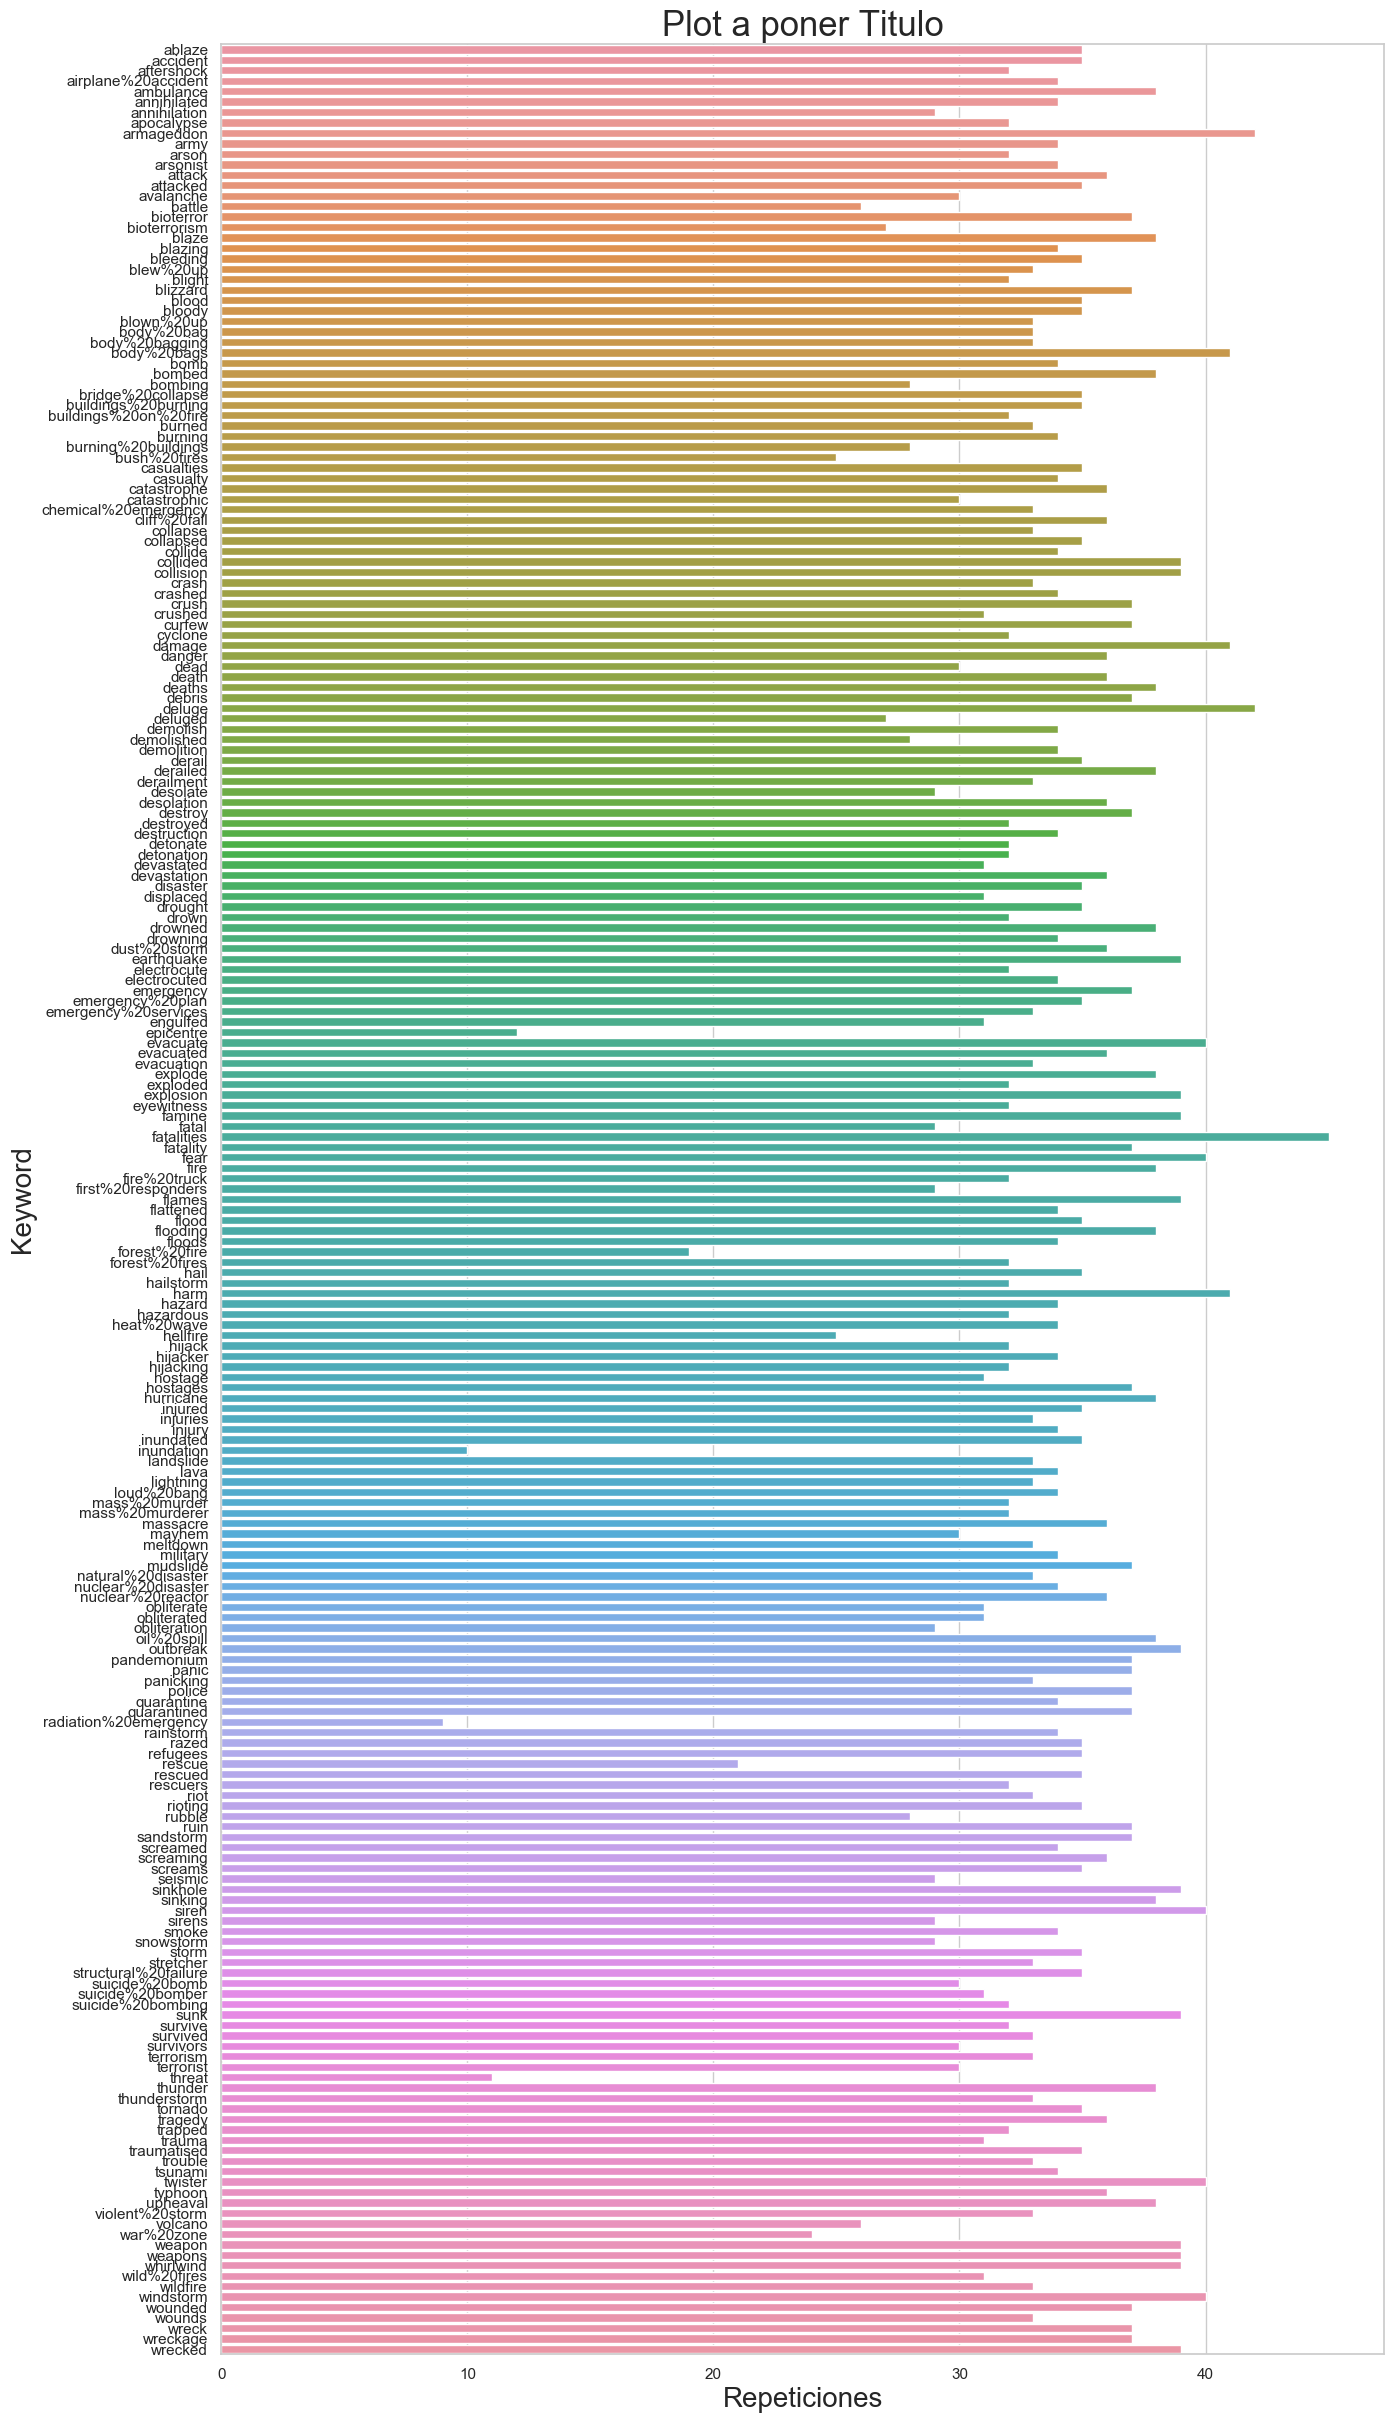

In [57]:
ax = sns.barplot(x="cantidad", y="keyword", data=C_grouped,orient='h')

ax.set_ylabel('Keyword', fontsize=20)
ax.set_xlabel('Repeticiones', fontsize=20)
ax.set_title("Plot a poner Titulo", fontsize=25)

In [ ]:
#TODO, achicar keywords--> Agrupara los que significan casi lo mismo